# Generate data with uniform and Gaussian distributions

In [1]:
#Generate data with Gaussian distribution
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

def calculate_entropy(p_x):
    eps = 0.000001
    p_x += eps
    temp = p_x * torch.log(p_x)
    return -1 * temp.sum()    

def plot_bar(bins, histogram):
    """Bar plot"""
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    axes.bar(bins[1:].tolist(), histogram.tolist())
    plt.show()






In [3]:
p_x = torch.tensor([1.0])
print(calculate_entropy(p_x))

tensor(-9.5367e-07)


In [2]:
n = 1000
#create gaussian noise values
normal_dist = torch.distributions.Normal(torch.tensor([10.0]), torch.tensor([3]))
#first sample
gaussian_sample = normal_dist.sample((n,1))
gaussian_sample = gaussian_sample.squeeze()
print("gaussian_sample shape\n", gaussian_sample.shape)




gaussian_sample shape
 torch.Size([1000])


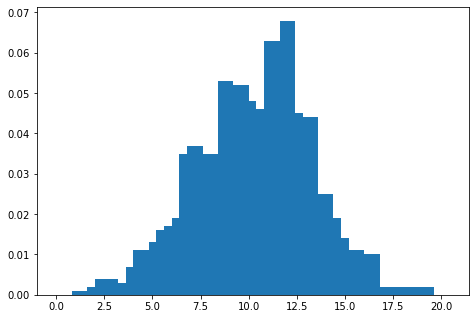

In [3]:
#calculate histogram
histogram, bins = np.histogram(gaussian_sample.numpy(), bins = 50, range = (0, 20))
p_1 = torch.tensor(histogram / histogram.sum())
#plot histogram
plot_bar(bins, p_1.numpy())


In [4]:




print("verify p[x] property")
print("Sum values is 1: ", p_1.sum())
mean_x = torch.mean(gaussian_sample)
print("mean_x ", mean_x)


std_x = torch.std(gaussian_sample)
print("std_x ", std_x)

ent_p1 = calculate_entropy(p_1)
#ent2 = entropy([0.5, 0.5], base=2)
print("Entropy P_1: ", ent_p1)

verify p[x] property
Sum values is 1:  tensor(1., dtype=torch.float64)
mean_x  tensor(10.0896)
std_x  tensor(2.9702)
Entropy P_1:  tensor(3.3931, dtype=torch.float64)


In [5]:
a = torch.tensor([5.0, 5.0, 10.0, 10.0])
print(torch.mean(a))
print(torch.var(a))

tensor(7.5000)
tensor(8.3333)


In [35]:
#example of mean determination
#using sample information
h = torch.tensor([20.0, 20.0, 20.0, 1.0])
mean_h = h.sum() / h.shape[0]
print(" mean_h ", mean_h)
print(" mean h ", torch.mean(h))
(p_x, bins) = np.histogram(h.numpy(), range = (0, 30), bins = 3)
p_x = torch.tensor(p_x / p_x.sum(), dtype = torch.float)
print("p_x \n ", p_x / p_x.sum())
print("bins \n ", bins)
bins = torch.tensor([1.0, 15.0, 20.0], dtype = torch.float)
mean_h_2 = bins.dot(p_x)
print("mean_h ", mean_h_2)
#variance
var_x = (1/(h.shape[0]- 1) )*((h - mean_h) ** 2).sum()

print(" var manually ", var_x)
print(" var pytorch ", h.var())



 mean_h  tensor(15.2500)
 mean h  tensor(15.2500)
p_x 
  tensor([0.2500, 0.0000, 0.7500])
bins 
  [ 0. 10. 20. 30.]
mean_h  tensor(15.2500)
 var manually  tensor(90.2500)
 var pytorch  tensor(90.2500)


In [13]:
p_x = torch.tensor([0, 1.0, 0])
H_x = calculate_entropy(p_x)
print(H_x)


tensor(3.8487e-05)


In [3]:
x = torch.tensor([10, 11, 11.0, 11, 10, 2, 15, 10, 11, 11])
expected_value = x.mean()
print("expected_value ", expected_value)
var_x = (x - expected_value) ** 2
var_x = (1 / (x.shape[0] - 1))* var_x.sum()

print("var_x ", var_x)
var_x_pytorch = x.var()
print("var_x_pytorch ", var_x_pytorch)

expected_value  tensor(10.2000)
var_x  tensor(10.4000)
var_x_pytorch  tensor(10.4000)


In [16]:
#entropy
p_x = torch.tensor([0.1, 0.3, 0.5, 0.1])
entropy_x = calculate_entropy(p_x)
print("entropy_x ", entropy_x)


entropy_x  tensor(1.6855)


In [13]:
#expectation
#expectation definition
x_times_p_x = p_1 * bins[0:-1]
expectation = x_times_p_x.sum()
print("Expectation definition E[X]: ", expectation)
#sample mean
sample_mean = torch.mean(gaussian_sample)
print("Sample mean ", sample_mean)


Expectation definition E[X]:  tensor(10.0166, dtype=torch.float64)
Sample mean  tensor(10.1386)


In [ ]:
#Uniform distribution
uniform_sample = 20 * torch.rand(1000)
histogram2, bins2 = np.histogram(uniform_sample.numpy(), bins = 10, range = (0, 20))
p_2 = torch.tensor(histogram2 / histogram2.sum())
plot_bar(bins2, p_2.numpy())
ent_p2 = calculate_entropy(p_2)
print("Entropy P_2: ", ent_p2)

## Covariance matrix

In [7]:
import torch
X = torch.tensor([[10.0, 12, 14, 16], [20.0, 24, 28, 32]])
mean_array = torch.zeros(2)
var_array = torch.zeros(2)
mean_array[0] = torch.mean(X[0, :])
mean_array[1] = torch.mean(X[1, :])
var_array[0] = torch.var(X[0, :])
var_array[1] = torch.var(X[1, :])

print("mean array \n ", mean_array)
Sigma = torch.cov(X)
print("Sigma \n ", Sigma)
print("var array  \n", var_array)

mean array 
  tensor([13., 26.])
Sigma 
  tensor([[ 6.6667, 13.3333],
        [13.3333, 26.6667]])
var array  
 tensor([ 6.6667, 26.6667])


# Generate noisy data with linear correlation

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt



## Gaussian noise signal contamination

In [19]:
#create x values
x_torch = torch.arange(1, 10, 0.5)
print(x_torch)

tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000,
        5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])


In [27]:
#create y values
#create gaussian noise values
normal_dist = torch.distributions.Normal(torch.tensor([0.0]), torch.tensor([9.0]))
epsilon_gaussian = normal_dist.sample(x_torch.shape).squeeze()

print("Datos con distribucion gaussiana")
print(epsilon_gaussian)

#include gaussian noise values
y_torch = 2.1 * x_torch + epsilon_gaussian
print(epsilon_gaussian.shape)
print(y_torch.shape)
print(x_torch.shape)

Datos con distribucion gaussiana
tensor([ -3.5654, -18.2840,  12.2480,  -0.8768,   9.4286,  -8.0405,  -7.9726,
         11.3706,  -6.2527, -11.3123,  -1.4864,  -3.6100,   4.7296,  -9.6141,
         -6.4992, -11.9076,  -2.0198,   6.2154])
torch.Size([18])
torch.Size([18])
torch.Size([18])


## Scatter plot

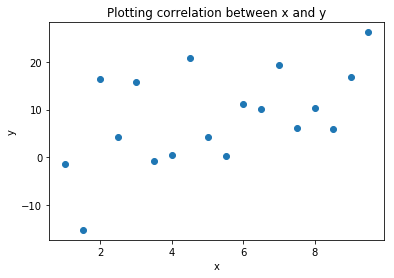

In [28]:
# Plot
plt.scatter(x_torch, y_torch)
plt.title('Plotting correlation between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Evaluate the distance between two distributions
We can evaluate the Gaussian distribution analytically

Gauss value  tensor(0.3989)


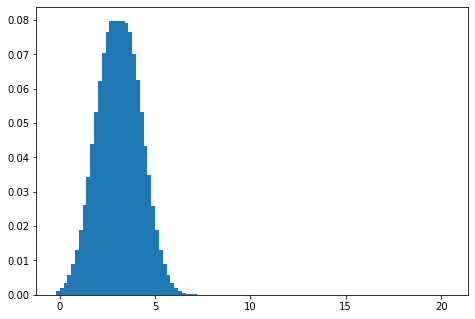

value evaluated : 5.0
Gauss value hist  tensor(0.0089, dtype=torch.float64)
torch sum  tensor(1., dtype=torch.float64)


In [45]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
torch.pi = torch.tensor(np.pi)
"""
Evaluate the gaussian function analytically 2d
"""
def evaluate_gaussian_2d(mu_array, Sigma, x_array):
    num_dimensions = mu_array.shape[0]
    print("num dimensions ", num_dimensions)
    determinant_Sigma = torch.det(Sigma)
    #normalization factor
    norm_factor =  1 / torch.sqrt((2 * torch.pi)** num_dimensions)
    #cuadratic form exponent
    cuadratic_form = (x_array - mu_array).transpose(0, 1).mm(Sigma.inverse()).mm(x_array - mu_array)
    #final value
    gauss_result = norm_factor * torch.exp(-0.5*cuadratic_form)
    return gauss_result


def evaluate_gaussian_1d_hist(mu, sigma):
    n = 1000000
    #create gaussian noise values
    normal_dist = torch.distributions.Normal(torch.tensor([mu]), torch.tensor([sigma]))
    gaussian_sample = normal_dist.sample((n,1)).squeeze()
    #print(gaussian_sample)
    #calculate histogram
    histogram, bins = np.histogram(gaussian_sample.numpy(), bins = 100, range = (0, 20))
    p_density = torch.tensor(histogram / histogram.sum())
    return (bins, p_density)

"""
Evaluate the gaussian function analytically 1d
"""
def evaluate_gaussian_1d(mu, sigma, x):
    #normalization coefficient
    norm_coefficient = 1 / (sigma * torch.sqrt(2 * torch.pi ))
    
    #exponent
    exponent = -0.5 * (((x - mu) / sigma) ** 2 )
    #final value
    gauss_result = norm_coefficient * torch.exp(torch.tensor(exponent))
    return gauss_result

def test_2d_evaluation():
    #always arrays 2D tensors
    #value to evaluate
    x_array = torch.tensor([[0.9], [3.0]])
    #mu of the gauss function
    mu_array = torch.tensor([[2.0], [3.0]])
    #Covariance matrix of the gaussian function
    Sigma = torch.tensor([[2.0, 0], [0, 3.0]])
    gauss_result = evaluate_gaussian_2d(mu_array, Sigma, x_array)
    print(gauss_result)

def test_1d_evaluation():
    mu = 3.0
    sigma = 1.0
    x = 3
    gauss_value = evaluate_gaussian_1d(mu, sigma, x)
    print("Gauss value ", gauss_value)
    #with histogram for array evaluation
    (bins, gauss_array) = evaluate_gaussian_1d_hist(mu, sigma)
    plot_bar(bins, gauss_array.numpy())
    print("value evaluated :", bins[25])
    print("Gauss value hist ", gauss_array[25])
    print("torch sum ", gauss_array.sum())

    
    
    
test_1d_evaluation()

#1d evaluation
    

First distribution


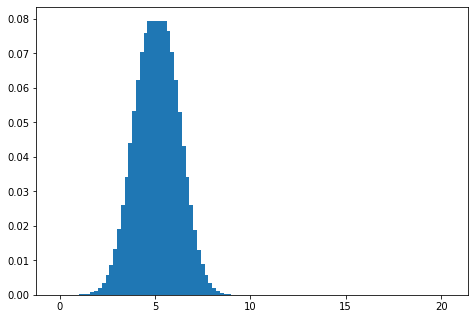

Second distribution


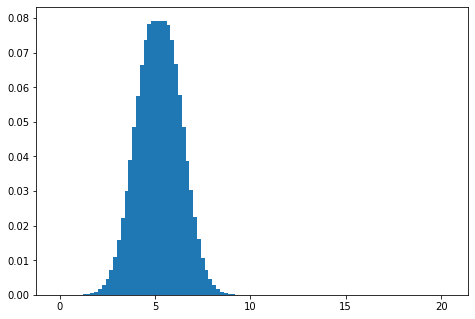

ce_result  tensor(3.0340, dtype=torch.float64)
hellinger distance  tensor(0.0003, dtype=torch.float64)


In [65]:
"""
Calculate cross entropy
"""
def calculate_cross_entropy(p, y):
    eps = 0.00001
    y_log = -torch.log(y + eps)
    ce_result = torch.sum(p * y_log)
    return ce_result

def calculate_bhattacharyya_distance(p, y):
    eps = 0.00001
    p += eps
    y += eps
    bhattacharyya_dist = -torch.log(torch.sum(torch.sqrt(p * y)))
    return bhattacharyya_dist

def test_1_near():
    #first distribution
    (bins_1, gauss_array_1) = evaluate_gaussian_1d_hist(5.0, 1.0)
    print("First distribution")
    plot_bar(bins_1, gauss_array_1.numpy())
    #second distribution
    (bins_2, gauss_array_2) = evaluate_gaussian_1d_hist(5.1, 1.0)
    print("Second distribution")
    plot_bar(bins_2, gauss_array_2.numpy())
    #calculate cross entropy
    ce_result = calculate_cross_entropy(gauss_array_1, gauss_array_2)
    print("ce_result ", ce_result)
    #calculate hellinger distance
    hellinger_dist = calculate_bhattacharyya_distance(gauss_array_1, gauss_array_2)
    print("Bhattarchayya distance ", hellinger_dist)
    
    
test_1_near()

    
